<p style="font-size:200%; font-weight:bold"> Twitter </p>

- Author: Yichen Luo
- Date: 20220805

- Q: All insiders? A: Only insiders 

In [125]:
from web3 import Web3, EthereumTesterProvider
import numpy as np
import tweepy
import configparser
import pandas as pd
import time
import datetime
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json

from IPython.core.interactiveshell import InteractiveShell

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)
InteractiveShell.ast_node_interactivity = 'all'
os.getcwd()

RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'

'/home/team_defi/01_code'

# Tweets

## Config

In [38]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

['config.ini']

## Example Token

In [39]:
rootlst = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider_new.csv')
rootlst.loc[rootlst['contract'] == False, :].groupby(['insider_root','insider_tokenName'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False)
rootlst.loc[rootlst['contract'] == False, :].groupby(['insider_root'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False)

/tmp/ipykernel_3126968/262273969.py:1: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  rootlst = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider_new.csv')


,insider_root,insider_tokenName,amountUSD
742,0x2d407ddb06311396fe14d4b49da5f0471447d45c,Bearn Finance,4.089221e+07
541,0x20f7c7e4b410af0d7309a04792fc22c7b4c7f46e,Governance OHM,3.410487e+07
2843,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,2.426123e+07
2314,0x8ca246551ffa910223a444fdccebfe8daf8ee838,MetaFabric,2.121517e+07
2729,0xa2bfc42c0000a4f97a09783979a73844f43635bb,USD Coin,2.062122e+07
...,...,...,...
4236,0xfdd30c561e74e9dfef66002e7a66a6f0f26b21e3,Lupin Inu,1.563332e-09
2903,0xaddb6c9a484e39ec91cf202ed77212247d00dcb2,Wrapped Ether,1.239765e-10
4134,0xf7636b5da1c317ac6c3ba4841e6e966046bbedfb,Wrapped Ether,1.061129e-10
2470,0x96132b1ebf160347a9a175891013c9f87d96ab42,Wrapped Ether,5.867510e-11


,insider_root,amountUSD
538,0x20f7c7e4b410af0d7309a04792fc22c7b4c7f46e,4.549605e+07
738,0x2d407ddb06311396fe14d4b49da5f0471447d45c,4.089221e+07
2830,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,2.426123e+07
2306,0x8ca246551ffa910223a444fdccebfe8daf8ee838,2.121517e+07
2717,0xa2bfc42c0000a4f97a09783979a73844f43635bb,2.062122e+07
...,...,...
4222,0xfdd30c561e74e9dfef66002e7a66a6f0f26b21e3,1.563332e-09
2890,0xaddb6c9a484e39ec91cf202ed77212247d00dcb2,1.239765e-10
4120,0xf7636b5da1c317ac6c3ba4841e6e966046bbedfb,1.061129e-10
2461,0x96132b1ebf160347a9a175891013c9f87d96ab42,5.867510e-11


In [366]:
rootlst.loc[rootlst['insider_root'] == '0x0fe60e55a8c0700b47d4a2663079c445fc4a5893']

,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract
3417,3417,0x4a57a04b0a747ea03478e6c64ae0ed201de7d05deb00764ab9ab5af7f23c7c6b#50828,-6.328598e+09,8.300000,31523.466572,592,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,2857303728316904131073299,-204615.0,2021-12-29 07:19:56,SOS,Wrapped Ether,0x3b484b82567a09e2588a13d54d032153f0c0aee0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4a57a04b0a747ea03478e6c64ae0ed201de7d05deb00764ab9ab5af7f23c7c6b,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,uniswapv3_ethereum,ethereum,NaN,NaN,False
3418,3418,0xeb430654f89659868656b882e22efe690fd7fc69c2f7e337865d8aef8f7cdd34#155412,-9.344232e+03,5.000000,9334.957221,170,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,1832321992293384443146790741880119,200985.0,2021-06-25 12:17:56,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xeb430654f89659868656b882e22efe690fd7fc69c2f7e337865d8aef8f7cdd34,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,uniswapv3_ethereum,ethereum,NaN,NaN,False
3419,3419,0xeb430654f89659868656b882e22efe690fd7fc69c2f7e337865d8aef8f7cdd34#53979,9.344232e+03,-9342.607589,9338.282781,173,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0xe592427a0aece92de3edee1f18e0157c05861564,79241086839942311634516299914,3.0,2021-06-25 12:17:56,USD Coin,Tether USD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0xeb430654f89659868656b882e22efe690fd7fc69c2f7e337865d8aef8f7cdd34,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,uniswapv3_ethereum,ethereum,NaN,NaN,False
3420,3420,0x027f11bb9128807d4010336021a7e9cb81d12c8d971201d4b935538dc128219c#2170,1.700000e+03,-0.049161,138.172839,141,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,427479140600602378223566240,-104449.0,2022-05-01 17:15:54,The Other Side Token,Wrapped Ether,0x967ea106144ff482ca13d1ab1f7e3747ff590531,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x027f11bb9128807d4010336021a7e9cb81d12c8d971201d4b935538dc128219c,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,uniswapv3_ethereum,ethereum,NaN,NaN,False
3421,3421,0xbfbee15b32ac466b1f188ce0decdca64941b01ac9be7d9e9df905de12f5d94ba#540,1.202268e+07,-0.832422,3157.775083,243,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,20505059421137497129557170,-165197.0,2021-12-29 06:31:01,Gas DAO,Wrapped Ether,0x6bba316c48b49bd1eac44573c5c871ff02958469,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xbfbee15b32ac466b1f188ce0decdca64941b01ac9be7d9e9df905de12f5d94ba,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,uniswapv3_ethereum,ethereum,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33815,33815,0x00177fc668e9dca4976fbe99a051de168e6e43cbbc93d98dbf3550c5ca1baede-0,6.666667e+08,0.030604,56.887821,84,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-06-25 12:38:49,Ethereum Pro,Wrapped Ether,0xba630d3ba20502ba07975b15c719beecc8e4ebb0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00177fc668e9dca4976fbe99a051de168e6e43cbbc93d98dbf3550c5ca1baede,0x0fe60e55a8c0700b47d4a2663079c445fc4a5893,Wrapped Ether,WETH,0xC02aaA39b223FE8D0A0e5C4F27e

In [374]:
processed = pd.read_csv('/home/yichen/2022_nft/03_wdata/processed/root_ethereum_unwrapped.csv')
processed.loc[processed['root'] == '0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09']

,root,tokenName,tokenSymbol,contractAddress
835,0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09,Dai Stablecoin,DAI,0x6b175474e89094c44da98b954eedeac495271d0f


In [375]:
tf = pd.read_csv('/home/yichen/2022_nft/03_wdata/root/tf_ethereum.csv')
tf.loc[(tf['from'] == '0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09')|(tf['to'] == '0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09')]

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
3892,13760697,1638909161,0x33dea1cfaa550c829add0c7b9f12b117ea9761d760daa7c1faf4f52ee2d72f75,58,0xc37ac7ceb37eebcbb462654f7a826bb65febab9e1d5b04280088ee00e67610ff,0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xe2fe530c047f2d85298b07d9333c05737f1435fb,207501222,Wrapped BTC,WBTC,8.0,95,600000,79423676818,318218,9544367,deprecated,1222100
3894,13760749,1638909839,0x4c8229082816baf25da029a848d22dae59939da42fa1a122451521597c202d7a,62,0x77be1975005766c02a9ff2546b0621bdd2ab593ac120da8fadb3641bc6730bda,0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09,0x6b175474e89094c44da98b954eedeac495271d0f,0xe2fe530c047f2d85298b07d9333c05737f1435fb,60108000000000000000000,Dai Stablecoin,DAI,18.0,51,600000,110863233851,296776,2664431,deprecated,1222048
6105,14169407,1644376617,0x03f26b1e3883049bb561f314129f11deb4bd84ee7a3f35d0c26da93fcdc10a24,64,0x88197f5196007e45d38d52b857dae9904ab4770231e67fff341fef576d26d47c,0xe2fe530c047f2d85298b07d9333c05737f1435fb,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09,207501222,Wrapped BTC,WBTC,8.0,50,600000,60072404269,105666,3476505,deprecated,813394
7452,14347554,1646761293,0x16accb6a5e2b18f2bc1d694ef56da4b2b4bb7d36271926b6feb0881a6d21ae64,73,0x5f1b144ac841dcba322cfa38836c536159f10f62231d38cdf7d04cb9831c0cb8,0xe2fe530c047f2d85298b07d9333c05737f1435fb,0x6b175474e89094c44da98b954eedeac495271d0f,0x9124a33ea0574e894dcc31a3e7754bb8b5f01d09,60108000000000000000000,Dai Stablecoin,DAI,18.0,88,600000,38121502582,76430,9049433,deprecated,635247


## Pull Data

In [382]:
api = tweepy.API(auth)
users = api.search_users('Governance OHM')

users

users[0].id
users[0].id_str
users[0].name
users[0].location
users[0].screen_name

[]

IndexError: list index out of range

In [44]:
timestamp = []
text = []
iter_num = 0

while True:
    iter_num += 1
    if iter_num == 1:
        tweets = api.user_timeline(user_id=1408806420233916416, 
                               # 200 is the maximum allowed count
                               count=200,
                               exclude_replies = True,
                               include_rts = True,
                               # Necessary to keep full_text 
                               # otherwise only the first 140 words are extracted
                               tweet_mode = 'extended'
                           )
    else:
        tweets = api.user_timeline(user_id=1408806420233916416, 
                                   # 200 is the maximum allowed count
                                   count=200,
                                   exclude_replies = True,
                                   include_rts = True,
                                   max_id = oldest_id - 1,
                                   # Necessary to keep full_text 
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode = 'extended'
                               )
    if len(tweets) == 0: break
    
    for tweet in tweets:
        timestamp.append(tweet.created_at)
        text.append(tweet.full_text)
    
    oldest_id = tweets[-1].id
    print(f'the number of tweets: {len(tweets)}')

the number of tweets: 152
the number of tweets: 115
the number of tweets: 130
the number of tweets: 120
the number of tweets: 129
the number of tweets: 116
the number of tweets: 144
the number of tweets: 117
the number of tweets: 133
the number of tweets: 128
the number of tweets: 137
the number of tweets: 113
the number of tweets: 114
the number of tweets: 109
the number of tweets: 108
the number of tweets: 106
the number of tweets: 27


In [45]:
df = pd.DataFrame({'timestamp':timestamp, 'text':text})
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d')

In [46]:
rootlst['timestamp'] = pd.to_datetime(rootlst['timestamp'])
rootlst['timestamp'] = rootlst['timestamp'].dt.strftime('%Y-%m-%d')

In [47]:
df1 = df.sort_values('timestamp', ascending=True).groupby(['timestamp'])['text'].count().reset_index()
df2 = rootlst.loc[rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b'].groupby(['timestamp'])['id'].count().reset_index()
df3 = rootlst.loc[rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b'].groupby(['timestamp'])['amountUSD'].sum().reset_index()

In [104]:
calendar = pd.DataFrame(pd.date_range(dft['timestamp'].min(), dft['timestamp'].max()), columns=['timestamp']).set_index('timestamp').reset_index()
calendar.dtypes

timestamp    datetime64[ns]
dtype: object

<AxesSubplot:xlabel='timestamp'>

<AxesSubplot:xlabel='timestamp'>

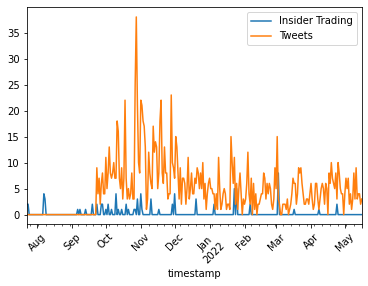

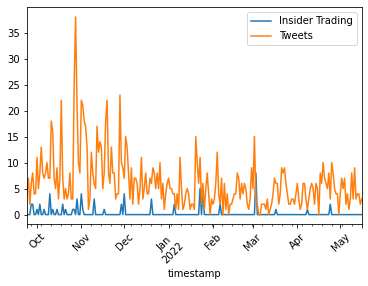

In [161]:
dft = df1.merge(df2, how='outer', on='timestamp')
dft = dft.merge(df3, how='outer', on='timestamp')

dft['timestamp'] = pd.to_datetime(dft['timestamp'])
calendar = pd.DataFrame(pd.date_range(dft['timestamp'].min(), dft['timestamp'].max()), columns=['timestamp'])
dft = dft.merge(calendar, how='outer', on='timestamp')

dft = dft.replace(np.nan, 0)
dft.rename(columns={'id':'Insider Trading', 'text':'Tweets'}, inplace=True)

dft.sort_values('timestamp', ascending=True, inplace=True)
dft = dft.loc[(dft['timestamp'] >= '2020-09-18')&(dft['timestamp'] <= '2022-05-16')]
dft.set_index('timestamp')[['Insider Trading', 'Tweets']].plot(rot=45)

dft.loc[(dft['timestamp']>df1['timestamp'].min())&(dft['timestamp']<df1['timestamp'].max())].set_index('timestamp')[['Insider Trading', 'Tweets']].plot(rot=45)


# Events

## Listing

In [163]:
dft.sort_values('timestamp', ascending=True, inplace=True)
dft['timestamp'] = dft['timestamp'].dt.strftime('%Y-%m-%d')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(2022-02-15, 8, 'Event 1 2022-03-02\nListing on Huobi')

Text(2022-01-03, 7, 'Event 2 2022-01-24\nUpgrade FLOKI Contract')

Text(2021-09-01, 7, 'Event 3 2021-09-17\nListing on Gate.io')

Text(2021-12-08, 8, 'Event 4 2021-12-28\nListing on BitGlobal')

Text(2021-08-10, 8, 'Event 5 2021-08-27\nListing on Hotbit')

Text(2021-11-15, 7, 'Event 6 2021-11-19\nBEP-20 Listing\non Crypto.com')

Text(2021-10-10, 8, 'Event 7 2021-11-12\nListing on Bitmart, FMFW.io')

Text(2021-10-01, 6, 'Event 8 2021-10-27\nListing on StealthEX.io')

Text(2021-07-23, 6, 'Event 9 2021-08-01\nListing on Barter Trade.io')

Text(2021-10-15, 5, 'Event 10 2021-11-04\n ERC-20 Listing\non Crypto.com')

Text(2022-03-03, 5, '2022-03-03\nShort FLOKI')

Text(2022-01-01, 3, '2022-01-23\nFLOKI Liquidity\nProvision')

Text(2022-01-25, 4, '2022-01-25\nShort FLOKI\nLong FLOKI\nFLOKI Liquidity\nProvision')

Text(2021-10-05, 4, '2021-10-26\nLong FLOKI')

Text(2021-11-01, 4, '2021-11-01\nLong FLOKI')

Text(2021-09-20, 3, '2021-10-06\nLong FLOKI')

Text(0.5, 1.0, 'Events of FLOKI')

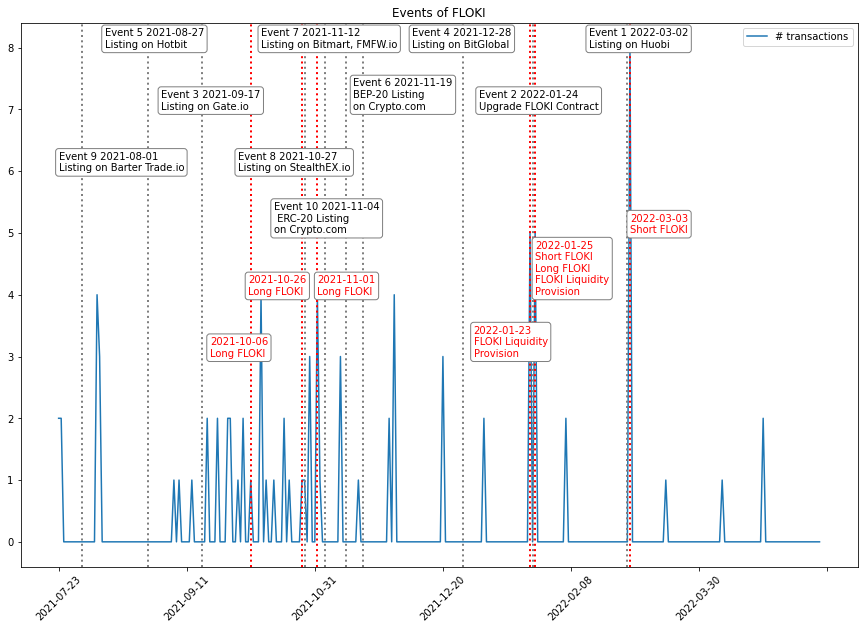

In [322]:
# plt.annotate('2022-03-02: Listing on Huobi',
#              ha='center',
#              va='bottom',
#              xytext=('2022-05-02',9),
#              xy=('2022-03-02', 8),
#              arrowprops={'facecolor':'black', 'shrink':0.5}
#              )

# plt.axvline(x='2022-03-03', color='red', linestyle='dotted', linewidth=2)
# plt.text('2022-03-06', 6,'2022-03-06:\nSwap FLOKI for Ether', bbox=box2)

y1 = dft['Insider Trading'].values
y2 = dft['Tweets'].values
y3 = dft['amountUSD'].values
x = dft['timestamp'].values
box1 = {'facecolor':'1',
       'edgecolor':'grey',
       'boxstyle':'round'
      }
box2 = {'facecolor':'1',
       'edgecolor':'red',
       'boxstyle':'round'
      }


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x, y1, label='# transactions')
# ax.plot(x, y2, label='# of tweets')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xticks(rotation=45)


plt.axvline(x='2022-03-02', color='grey', linestyle='dotted', linewidth=2)
plt.text('2022-02-15', 8,'Event 1 2022-03-02\nListing on Huobi', bbox=box1)

plt.axvline(x='2022-01-24', color='grey', linestyle='dotted', linewidth=2)
plt.text('2022-01-03', 7,'Event 2 2022-01-24\nUpgrade FLOKI Contract', bbox=box1)

plt.axvline(x='2021-09-17', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-09-01', 7,'Event 3 2021-09-17\nListing on Gate.io', bbox=box1)

plt.axvline(x='2021-12-28', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-12-08', 8,'Event 4 2021-12-28\nListing on BitGlobal', bbox=box1)

plt.axvline(x='2021-08-27', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-08-10', 8,'Event 5 2021-08-27\nListing on Hotbit', bbox=box1)

plt.axvline(x='2021-11-19', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-11-15', 7,'Event 6 2021-11-19\nBEP-20 Listing\non Crypto.com', bbox=box1)

plt.axvline(x='2021-11-12', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-10-10', 8,'Event 7 2021-11-12\nListing on Bitmart, FMFW.io', bbox=box1)

plt.axvline(x='2021-10-27', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-10-01', 6,'Event 8 2021-10-27\nListing on StealthEX.io', bbox=box1)

plt.axvline(x='2021-08-01', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-07-23', 6,'Event 9 2021-08-01\nListing on Barter Trade.io', bbox=box1)

plt.axvline(x='2021-11-04', color='grey', linestyle='dotted', linewidth=2)
plt.text('2021-10-15', 5,'Event 10 2021-11-04\n ERC-20 Listing\non Crypto.com', bbox=box1)



plt.axvline(x='2022-03-03', color='red', linestyle='dotted', linewidth=2)
plt.text('2022-03-03', 5,'2022-03-03\nShort FLOKI', bbox=box1, color='red')

plt.axvline(x='2022-01-23', color='red', linestyle='dotted', linewidth=2)
plt.text('2022-01-01', 3,'2022-01-23\nFLOKI Liquidity\nProvision', bbox=box1, color='red')

plt.axvline(x='2022-01-25', color='red', linestyle='dotted', linewidth=2)
plt.text('2022-01-25', 4,'2022-01-25\nShort FLOKI\nLong FLOKI\nFLOKI Liquidity\nProvision', bbox=box1, color='red')

plt.axvline(x='2021-10-26', color='red', linestyle='dotted', linewidth=2)
plt.text('2021-10-05', 4,'2021-10-26\nLong FLOKI', bbox=box1, color='red')

plt.axvline(x='2021-11-01', color='red', linestyle='dotted', linewidth=2)
plt.text('2021-11-01', 4,'2021-11-01\nLong FLOKI', bbox=box1, color='red')

plt.axvline(x='2021-10-06', color='red', linestyle='dotted', linewidth=2)
plt.text('2021-09-20', 3,'2021-10-06\nLong FLOKI', bbox=box1, color='red')


plt.title('Events of FLOKI')

plt.legend()
plt.show()

In [140]:
dft.loc[dft['timestamp'] == '2021-09-17']
df.loc[df['timestamp'] == '2021-09-17']

,timestamp,Tweets,Insider Trading,amountUSD
370,2021-09-17,0.0,0.0,0.0


,timestamp,text


### 2022-03-02

Text(0, 0.5, 'Frequency')

Text(0, 0.5, 'USD')

Text(0.5, 0, 'Event Window')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0.98, 'Listing Event of FLOKI at 2022-01-24')



2022-01-24 Listing Event: The recent launch of the #Valhalla Battle Arena prototype and $FLOKI's listing on #Huobi today show that Floki is making solid progress when it comes to both utility and adoption!




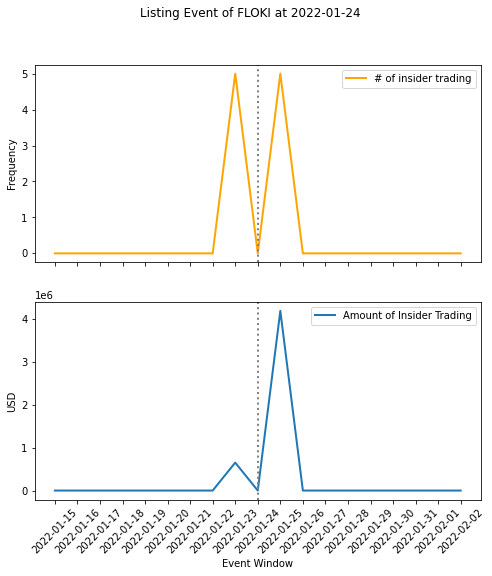

/tmp/ipykernel_3126968/2204660276.py:36: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  rootlst = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider_new.csv')


,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract
10803,10803,0x1049e2643a201f6d90a74498c5bce43c2148e0ae8ee4e3ddd6429217e2a62fca-0,1.187501e-03,6.355533e+04,1.436446e+00,183,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-23 02:52:05,Wrapped Ether,FLOKI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,0x1049e2643a201f6d90a74498c5bce43c2148e0ae8ee4e3ddd6429217e2a62fca,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
724,724,0xf5b34ff639cee76192381bbcd83851d58a6bbf54c7a6950f4c0dda0565fab3a3#728976,2.000000e+01,-4.986426e+04,4.982580e+04,197,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x1111111254fb6c44bac0bed2854e76f90643097d,3956351818719815107852094,-198106.0,2022-01-23 13:01:26,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xf5b34ff639cee76192381bbcd83851d58a6bbf54c7a6950f4c0dda0565fab3a3,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
723,723,0x2a0c173eaf6f017b840ad187b463544d1a54da2808278513d4ed0375350e75b7#729002,2.000000e+01,-4.983229e+04,4.980982e+04,108,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x1111111254fb6c44bac0bed2854e76f90643097d,3955083560524934857579715,-198112.0,2022-01-23 13:21:16,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0x2a0c173eaf6f017b840ad187b463544d1a54da2808278513d4ed0375350e75b7,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
729,729,0x60f4c8f3fda64d78ded2b26bcede7d803837cc375350c16b5d850c84c2956523#1236483,-2.752644e+05,1.100000e+02,2.750465e+05,330,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x1111111254fb6c44bac0bed2854e76f90643097d,0x1111111254fb6c44bac0bed2854e76f90643097d,1583514113644615267589549258841807,198066.0,2022-01-23 13:34:56,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x60f4c8f3fda64d78ded2b26bcede7d803837cc375350c16b5d850c84c2956523,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
730,730,0x60f4c8f3fda64d78ded2b26bcede7d803837cc375350c16b5d850c84c2956523#41785,2.752644e+05,-2.752696e+05,2.752670e+05,333,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x1111111254fb6c44bac0bed2854e76f90643097d,79232841022477590566007846787,1.0,2022-01-23 13:34:56,USD Coin,Tether USD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0x60f4c8f3fda64d78ded2b26bcede7d803837cc375350c16b5d850c84c2956523,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
10805,10805,0xeaaa4d08f61edd176b2c273b686088099322ccd5104ca44eb70c7a74632918d3-0,1.369493e+07,2.408950e-01,5.790850e+02,117,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-25 02:50:02,FLOKI,Wrapped Ether,0x43f11c02439e2736800433b4594994bd43cd066d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xeaaa4d08f61edd176b2c273b686088099322ccd5104ca44eb70c7a74632918d3,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
10806,10806,0xeaaa4d08f61edd176b2c

In [324]:
date = '2022-01-24'

y1 = dft.loc[(pd.to_datetime(dft['timestamp'])>(pd.to_datetime(date) - datetime.timedelta(days=10)))&
             (pd.to_datetime(dft['timestamp'])<(pd.to_datetime(date) + datetime.timedelta(days=10)))
            ]['Insider Trading'].values
y2 = dft.loc[(pd.to_datetime(dft['timestamp'])>(pd.to_datetime(date) - datetime.timedelta(days=10)))&
             (pd.to_datetime(dft['timestamp'])<(pd.to_datetime(date) + datetime.timedelta(days=10)))
            ]['Tweets'].values
y3 = dft.loc[(pd.to_datetime(dft['timestamp'])>(pd.to_datetime(date) - datetime.timedelta(days=10)))&
             (pd.to_datetime(dft['timestamp'])<(pd.to_datetime(date) + datetime.timedelta(days=10)))
            ]['amountUSD'].values
x = dft.loc[(pd.to_datetime(dft['timestamp'])>(pd.to_datetime(date) - datetime.timedelta(days=10)))&
             (pd.to_datetime(dft['timestamp'])<(pd.to_datetime(date) + datetime.timedelta(days=10)))
            ]['timestamp'].values

fig, (ax,bx) = plt.subplots(2,1,sharex=True, figsize=(8,8))
ax.plot(x, y1, label='# of insider trading', lw=2, color='orange')
# ax.plot(x, y2, label='# of tweets & retweets', lw=2)
bx.plot(x, y3, label='Amount of Insider Trading', lw=2)
ax.axvline(x=date, color='grey', linestyle='dotted', linewidth=2)
bx.axvline(x=date, color='grey', linestyle='dotted', linewidth=2)
ax.set_ylabel('Frequency')
bx.set_ylabel('USD')
bx.set_xlabel('Event Window')
ax.legend()
bx.legend()
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=45)
# fig.suptitle(f'Listing Event of FLOKI at {date}')
fig.suptitle(f'Listing Event of FLOKI at {date}')
print('\n')
print(f'{date} Listing Event: The recent launch of the #Valhalla Battle Arena prototype and $FLOKI\'s \033[31mlisting\033[0m on #Huobi today show that Floki is making solid progress when it comes to both utility and adoption!')
print('\n')
plt.show()

rootlst = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider_new.csv')
rootlst.loc[(rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b')&
            (pd.to_datetime(rootlst['timestamp'])>(pd.to_datetime(date) - datetime.timedelta(days=10)))&
            (pd.to_datetime(rootlst['timestamp'])<(pd.to_datetime(date) + datetime.timedelta(days=10)))
           ].sort_values('timestamp', ascending=True)

In [335]:
rootlst.loc[(rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b')&
            ((rootlst['token0_id'] == '0xcf0c122c6b73ff809c693db761e7baebe62b6a2e')|
             (rootlst['token1_id'] == '0xcf0c122c6b73ff809c693db761e7baebe62b6a2e'))
           ].sort_values('timestamp', ascending=True)

,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract
10803,10803,0x1049e2643a201f6d90a74498c5bce43c2148e0ae8ee4e3ddd6429217e2a62fca-0,0.001188,6.355533e+04,1.436446e+00,183,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-23 02:52:05,Wrapped Ether,FLOKI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,0x1049e2643a201f6d90a74498c5bce43c2148e0ae8ee4e3ddd6429217e2a62fca,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
10812,10812,0x985e2589b0723b3520ab2a5a9b39799db097b7be9a2d7a8cf0c5e4c64f9a2a1f-0,416.670000,1.647148e+10,1.002389e+06,558,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-01-25 03:10:01,Wrapped Ether,FLOKI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,0x985e2589b0723b3520ab2a5a9b39799db097b7be9a2d7a8cf0c5e4c64f9a2a1f,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x25bb8ab7ac259a432236d6324b6976b44c016c76,False
10814,10814,0xab760a0b2c99a378ecbb091a106b08eeb571c099c844f3f7cb00827bc5967bfc-0,0.060203,1.366712e+06,1.447693e+02,416,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-25 03:28:51,Wrapped Ether,FLOKI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,0xab760a0b2c99a378ecbb091a106b08eeb571c099c844f3f7cb00827bc5967bfc,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
10810,10810,0x3790f51b0840933a0f9549ed54c6d34e662f7ddb09c807f6ebe8621b2d9bd723-0,0.047040,2.747682e+06,1.149202e+02,517,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-25 20:34:25,Wrapped Ether,FLOKI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,0x3790f51b0840933a0f9549ed54c6d34e662f7ddb09c807f6ebe8621b2d9bd723,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False


In [341]:
rootlst.loc[(rootlst['insider_root'] == '0x0fe60e55a8c0700b47d4a2663079c445fc4a5893')&
            ((rootlst['token0_name'] == 'Uniswap V2')|(rootlst['token1_name'] == 'Uniswap V2'))
           ].sort_values('timestamp', ascending=True)

,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract


In [233]:
rootlst.loc[(rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b')&
            ((rootlst['token0_name'] == 'USD Coin')|(rootlst['token1_name'] == 'USD Coin'))
           ].sort_values('timestamp', ascending=True)

rootlst.loc[(rootlst['insider_root'] == '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b')&
            ((rootlst['token0_name'] == 'Tether USD')|(rootlst['token1_name'] == 'Tether USD'))
           ].sort_values('timestamp', ascending=True)

,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract
747,747,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae#673535,-5.002142e+05,1.634957e+02,5.017153e+05,7,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,0xe592427a0aece92de3edee1f18e0157c05861564,1432702830798705955912454792784765,196064.0,2021-09-23 13:36:56,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
746,746,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae#127480,5.002142e+05,-5.000000e+05,5.000515e+05,8,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,0xe592427a0aece92de3edee1f18e0157c05861564,79230855860526476020576185607,0.0,2021-09-23 13:36:56,USD Coin,Tether USD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
716,716,0xc8065268d3edbcd9e0aed7b8c389fc0b174df1fa143154feee3fa47470a8a848#130096,5.002811e+05,-5.000000e+05,5.001346e+05,34,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,0xe592427a0aece92de3edee1f18e0157c05861564,79225570366695919978312337101,-1.0,2021-09-27 20:17:45,USD Coin,Tether USD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0xc8065268d3edbcd9e0aed7b8c389fc0b174df1fa143154feee3fa47470a8a848,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
717,717,0xc8065268d3edbcd9e0aed7b8c389fc0b174df1fa143154feee3fa47470a8a848#199974,-5.002811e+05,1.689777e+02,5.010441e+05,33,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,0xe592427a0aece92de3edee1f18e0157c05861564,1453930623971974406748826580418666,196358.0,2021-09-27 20:17:45,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc8065268d3edbcd9e0aed7b8c389fc0b174df1fa143154feee3fa47470a8a848,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
722,722,0xbbb2ac7681c67bc6c71b3e2ac79455d8aada93691df119f911844547dc5d3ced#724064,-4.804192e+05,1.410000e+02,4.809997e+05,22,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x27239549dd40e1d60f5b80b0c4196923745b1fd2,0x27239549dd40e1d60f5b80b0c4196923745b1fd2,1357506945337219098827544777174055,194986.0,2021-10-03 22:59:56,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xbbb2ac7681c67bc6c71b3e2ac79455d8aada93691df119f911844547dc5d3ced,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
740,740,0x9332a5b03757c618c6184c0e6e203cb5583163cf8ac9f6a614965bbdfafe050c#5060,1.962506e+03,-1.693680e+03,1.962506e+03,497,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x5ce9b49b7a1be9f2c3dc2b2a5bacea56fa21fbee,0xdef1c0ded9bec7f1a1670819833240f027b25eff,736204243836344070687487062,-93577.0,2021-10-10 13:45:36,USD Coin,STASIS EURS Token,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdb25f211ab05b1c97d595516f45794528a807ad8,0x9332a5b03757c618c6184c0e6e203cb5583163cf8ac9f6a614965bbdfafe050c,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswa

,Unnamed: 0,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to,contract
10826,10826,0xd3bca8af03f35c16874d57beb969dbd4e6002aeb4a4a4d5dad951ded34c06be7-0,1.000000e+02,3.906997e+05,3.920473e+05,4,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-09-06 17:26:36,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xd3bca8af03f35c16874d57beb969dbd4e6002aeb4a4a4d5dad951ded34c06be7,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,False
10824,10824,0x0badb76c506095824b7f625f716fca6753bf581b243a035685b42908bbfbe164-0,5.950000e+01,2.019829e+05,2.027207e+05,150,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-09-08 15:27:57,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0x0badb76c506095824b7f625f716fca6753bf581b243a035685b42908bbfbe164,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,False
10828,10828,0xc0af7d4740a06d8abe8715be533c26b28ec6b5de40e06c873cfff76d1360b5db-0,1.424000e+02,4.569263e+05,4.598832e+05,4,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-09-13 19:30:00,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xc0af7d4740a06d8abe8715be533c26b28ec6b5de40e06c873cfff76d1360b5db,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,False
10813,10813,0x0ccba49c90069f609c7abd623a71b2ffb82092fdd4ae8766df3187036bd33e5a-0,1.038331e+04,1.050000e+04,1.043008e+04,134,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-09-19 21:52:59,Dai Stablecoin,Tether USD,0x6b175474e89094c44da98b954eedeac495271d0f,0xdac17f958d2ee523a2206206994597c13d831ec7,0x0ccba49c90069f609c7abd623a71b2ffb82092fdd4ae8766df3187036bd33e5a,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv2_ethereum,ethereum,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,False
758,758,0xcc108236db08198854b93ecb669e1db554efe5cc9ec1a1dfe8974c29ced72b13#51479,-1.400000e+06,1.400924e+06,1.401515e+06,922,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,0xe592427a0aece92de3edee1f18e0157c05861564,79236335175846368038517,-276322.0,2021-09-19 22:13:58,Dai Stablecoin,Tether USD,0x6b175474e89094c44da98b954eedeac495271d0f,0xdac17f958d2ee523a2206206994597c13d831ec7,0xcc108236db08198854b93ecb669e1db554efe5cc9ec1a1dfe8974c29ced72b13,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
746,746,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae#127480,5.002142e+05,-5.000000e+05,5.000515e+05,8,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,0x2b9d5c7f2ead1a221d771fb6bb5e35df04d60ab0,0xe592427a0aece92de3edee1f18e0157c05861564,79230855860526476020576185607,0.0,2021-09-23 13:36:56,USD Coin,Tether USD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0x0f668148ff521bf4082168e59581dd5af1ed6def20346e0d07bee11d229a46ae,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,FLOKI,FLOKI,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,uniswapv3_ethereum,ethereum,NaN,NaN,False
716,716,0xc8065268d3edbcd9e0aed7b8c389fc0b174df1fa143154feee3fa47470a8a848#130096,5.002811e+05,-5

In [498]:
import os
import re

panel = []

for file in os.listdir(f'{WD}tweet/csv'):
    if re.search('txn', file) != None:
        panel.append(pd.read_csv(f'{WD}tweet/csv/{file}'))
        
panel = pd.concat(panel)

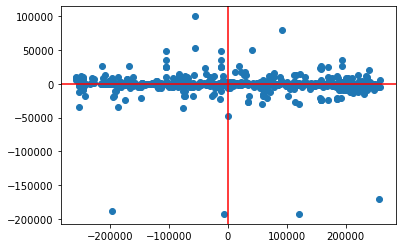

In [499]:
df = panel

time = pd.to_timedelta(df['time_delta']).dt.total_seconds()
buy = df['buy']

fig, ax = plt.subplots()

ax.scatter(time, buy)
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

plt.show()

In [500]:
df.loc[(df['buy'] > 0)&(pd.to_timedelta(df['time_delta']).dt.total_seconds() < 0)].shape[0]
df.loc[(df['buy'] < 0)&(pd.to_timedelta(df['time_delta']).dt.total_seconds() < 0)].shape[0]
df.loc[(df['buy'] > 0)&(pd.to_timedelta(df['time_delta']).dt.total_seconds() > 0)].shape[0]
df.loc[(df['buy'] < 0)&(pd.to_timedelta(df['time_delta']).dt.total_seconds() > 0)].shape[0]

162

161

191

181

In [501]:
df.loc[(df['buy'] > 0)&(pd.to_timedelta(df['time_delta']).dt.total_seconds() > 0)].sample(1)

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta
8,0x21368980b6d6e51e191cc3a8c9836acd50db63ca3e766afbd07265f289c3a2be-0,28.04302,4,NaN,NaN,0xe54ca86531e17ef3616d22ca28b0d458b6c89106,NaN,NaN,2021-05-19 17:06:32+00:00,RUGPULL,Wrapped AVAX,0x61ecd63e42c27415696e10864d70ecea4aa11289,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0x21368980b6d6e51e191cc3a8c9836acd50db63ca3e766afbd07265f289c3a2be,0x12c66f5f0636d7e4d51c0c322233eb83dfcea3cc,RUGPULL,RUGPULL,0x61ecd63e42c27415696e10864d70ecea4aa11289,pangolin_avalanche,avalanche,204.373739,0.0,0.0,1.0,0x12c66f5f0636d7e4d51c0c322233eb83dfcea3cc,0x12c66f5f0636d7e4d51c0c322233eb83dfcea3cc,False,28.04302,2021-05-18 08:17:26+00:00,1 days 08:49:06


In [477]:
dfn = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn.csv')
dfn = dfn.loc[(dfn['insider_tokenName'] == dfn['token0_name'])|
           (dfn['insider_tokenName'] == dfn['token1_name'])|
           (dfn['insider_contractAddress'] == dfn['token0_id'])|
           (dfn['insider_contractAddress'] == dfn['token1_id'])
            ]
lst = dfn.copy()
lst.drop_duplicates('insider_tokenSymbol', inplace=True)
lst = lst.loc[:, ['insider_tokenSymbol', 'insider_tokenName']]
lst['tweet'] = -1
lst['transaction'] = -1
lst.reset_index(inplace=True)
lst.drop(columns='index', inplace=True)
lst.reset_index(inplace=True)
lst

,index,insider_tokenSymbol,insider_tokenName,tweet,transaction
0,0,TKING,Tiger King,-1,-1
1,1,TRIBE,TRIBE,-1,-1
2,2,INCH,INCH TOKEN,-1,-1
3,3,BITA,BitAstir Token,-1,-1
4,4,TSGO,The Show Goes On,-1,-1
...,...,...,...,...,...
2586,2586,OKLP,OkLetsPlay,-1,-1
2587,2587,NXTT,NextEarthToken,-1,-1
2588,2588,DGH,Dogioh,-1,-1
2589,2589,POKI,POKI,-1,-1


In [492]:
lst.loc[lst['insider_tokenSymbol'] == 'SHIBGF']

,index,insider_tokenSymbol,insider_tokenName,tweet,transaction
53,53,SHIBGF,SHIBGF,-1,-1


In [493]:
csv = pd.read_csv(f'{WD}tweet/csv/tweet_53.csv')
csv.loc[csv['timestamp'] == '2021-10-30 16:47:54+00:00'].values

array([['2021-10-30 16:47:54+00:00',
        "Getting ready for @coinmarketcap and @coingecko listings by going through the submission process. It's only a matter of time before the world knows.\n\nMuch more in store as well. $SHIBGF is just starting.\n\n$SHIBGF\n\n#shibarmy #shibaswap #shibainu $SHIB $ETH #uniswap #cryptocurrency https://t.co/M2h1UivNwb"]],
      dtype=object)